# Lehmer's Algorithm Example
This example shows how the lehmer algorithm can be used to create a pseudorandom number sequence

Author: Lawrence Lechuga 08/13/2020

### Exercises:
In the following cells we will see two heurstic examples: 
1. An implementation of the Lehmer algorithm with smaller-sized numbers to serve as a simple and easily verifiable pseudorandom number generator
2. An implementation of the algorithm with more realistic (large) numbers to show a more real world implementation
  
For each of the examples, please ***perform the following:***
1. Run with the default values of $a$, $m$, and $Z_0$ (seedpoint)
2. Change the $m$ value to a non-prime value (see comments around assignment of $m$)
3. Change the $Z_0$ value to something besides 1; e.g. $Z_0=2$ or similar

With each of the setups think about the following:
1. What is the length of the sequence generated, in relationship to $m$
2. For the default setups, do you notice and "stucture" or pattern to the sequences generated?
    1. See the scatter and histogram plots
3. What happens when we change $m$ to a nonprime number?
4. What happens to the sequence when we change the seedpoint, $Z_0$?

In [2]:
# Import the relevant packages
import numpy as np
from matplotlib import pyplot as pt
from matplotlib.pyplot import hist
from matplotlib.figure import Figure
import random

## Exercise 1:

The lehmer random number generator is a type of algorithm (more aptly called a "linear congruential generator") that can be defined as:
\begin{equation*}
X_{i+1} = a \cdot X_{i} \text{  mod  } m
\end{equation*}
where a is a multiplicative factor, m is a "large" prime number, and $X_{0}$ is our seedpoint. Here, we set our prime number to $m = 23$ and our "seedpoint", $Z_{0}= 1$ This should give us a pseudorandom sequence length of 22, or $m-1$. Feel free to change the values and see what changes!

In [27]:
a = 6 # multiplicative factor
m = 23 # small prime number
# m = 20 # uncomment to try a non prime number! Try other values if you want
Z = np.zeros((2*m-2,)) #Create the sequence array 
Z[0] = 1 # seedpoint
# Z[0] = 2 # Test with a change in the seedpoint! Feel free to try other values

### Input into algorithm 
Lets test the above values for m = 23 and a = 6

In [29]:
for i in range(0,(2*(m-1)-1)):
    Z[i+1] = a*Z[i]%m  # note the modulo operation denoted by the "%"
print(Z)

[ 1.  6. 13.  9.  8.  2. 12.  3. 18. 16.  4.  1.  6. 13.  9.  8.  2. 12.
  3. 18. 16.  4.  1.  6. 13.  9.  8.  2. 12.  3. 18. 16.  4.  1.  6. 13.
  9.  8.  2. 12.  3. 18. 16.  4.]


## Plot of the sequence
Here we can take the values of our sequence and plot it against its index. 
- Thanks to Gödel's incompleteness theorems we cant quite prove that this finite-length array is a random sequence (and in fact it isnt), but we can assess qualitatively here for any noticeable structure or order.

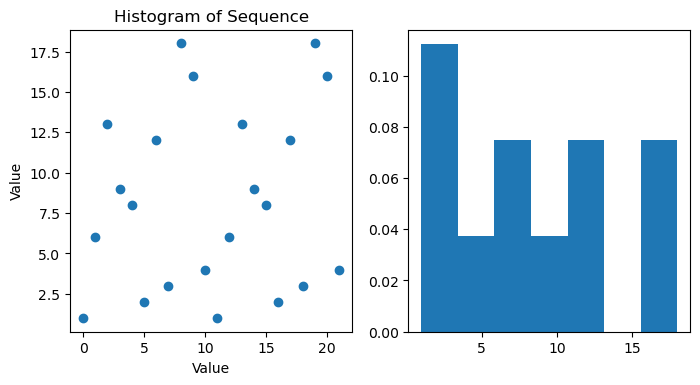

In [30]:
fig = pt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(121)
ax.scatter(range(0,m-1),Z[0:m-1]); pt.xlabel('Index'); 
ax.set_xlabel('Index'); pt.ylabel('Value');
ax.set_title('Pseudprandom Number Seqeunce');
ax2 = fig.add_subplot(122)
ax2.hist(Z,bins='auto', density=True, alpha=1)
ax.set_xlabel('Value')
ax.set_title('Histogram of Sequence');
pt.show()

## Exercise 2:
### Try this with a much bigger prime number
Below is a function definition that will: 
- Find the prime numbers within the start and end range that you define (or default range)
- Stores the list as an array
- Picks a random value within this prime array 

The last line in the cell below will calculate a large prime number, $m$.

In [40]:
del Z
# Python program to print all  
# prime number in an interval 
def pick_prime(start=10000, end=20000,print_primes=0):
    # Randomly picks large prime number between int start and end
    # print flag will print whole list
    primes =[];
    for ii in range(start,end): 
        for jj in range(2,ii): 
            if(ii % jj==0): 
                break
        else: 
            primes.append(ii)
            if print_primes ==1:
                print(ii)
    delta = len(primes)-1 # index from zero
    PRIME= primes[random.randint(0, delta)]
    print(PRIME)
    return PRIME, primes
    
m,primes = pick_prime()
# m = m+1 # uncomment to test with a nonprime number!

16447


### Redefine some values:

In [41]:
a = 5 # multiplicative factor
Z = np.zeros((2*m-2,)) #Create the sequence array 
Z[0] = 1 # Default Seedpoint
Z[0] = 2 # Test a change in the seedpoint! 

In [45]:
for i in range(0,(2*(m-1)-1)):
    Z[i+1] = a*Z[i]%m
print(Z)

[1.0000e+00 5.0000e+00 2.5000e+01 ... 1.2105e+04 1.1184e+04 6.5790e+03]


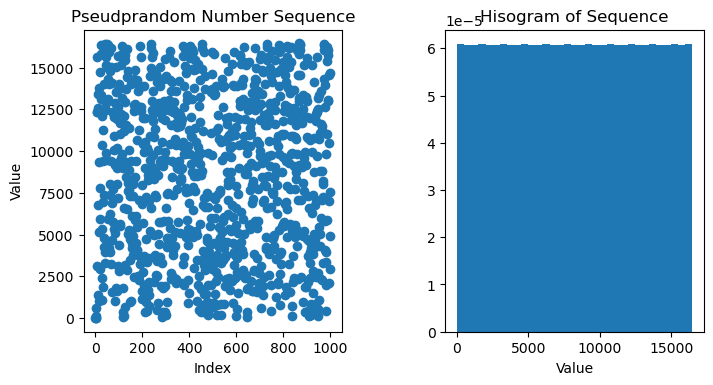

In [46]:
fig = pt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax3 = fig.add_subplot(121)
ax3.scatter(range(0,1000),Z[0:1000]); pt.xlabel('Index'); 
ax3.set_ylabel('Value');
ax3.set_title('Pseudprandom Number Sequence');

ax4 = fig.add_subplot(122)
ax4.hist(Z,bins='auto', density=True, alpha=1.0)
ax4.set_xlabel('Value')
ax4.set_title('Hisogram of Sequence')
pt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
pt.show()